In [1]:
# %load_ext autoreload
# %autoreload 2
%matplotlib inline

In [2]:
from branchynet.net import BranchyNet
from branchynet.links import *
import chainer.functions as F
import chainer.links as L
from branchynet import utils, visualize
from chainer import cuda

Define Network

In [3]:
from networks import resnet_cifar10

branchyNet = resnet_cifar10.get_network()
if cuda.available:
    branchyNet.to_gpu()
branchyNet.training()

Import Data

In [14]:
from datasets import pcifar10

x_train, y_train, x_test, y_test = pcifar10.get_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
training_size=50
x_train, y_train, x_test, y_test = x_train[:training_size*5], y_train[:training_size*5], x_test[:training_size], y_test[:training_size]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

#training size = 500, each epoch we need at least 2 minutes.
#this app need 30 cores and at least 20GB memory for UTSA server when training size is 500 .

((50000, 3, 32, 32), (50000,), (10000, 3, 32, 32), (10000,))
((250, 3, 32, 32), (250,), (50, 3, 32, 32), (50,))


Settings

In [15]:
TRAIN_BATCHSIZE = 128
TEST_BATCHSIZE = 1
TRAIN_NUM_EPOCHS = 50

Train Main Network

In [16]:
main_loss, main_acc, main_time = utils.train(branchyNet, x_train, y_train, main=True, batchsize=TRAIN_BATCHSIZE,
                                             num_epoch=TRAIN_NUM_EPOCHS)

1620772280.67
[ 98 156 223 184  95  43  91  36 226 107 182  58 249  55 150 187  42 101
 174 133  88 147   1  39 189 180 242  30 130 224  14 237 137 114  40 204
 128  37  82 248 211  80  15 129 192 151  24 136 164 173 220   8  70 134
 157 144  44 243 115 229  10 117  17   9  33 109 162 209 169  38  71 170
  67 146 241 142 179 200  96 158 235  56 103 138  46 112 176  18 132  79
 203 213  48 120 217 199  32  52  22 154  49  77 175  68 183 218  61 163
 125  63  29 222 196  99  62 214 172  20 245 233 139  85  66 167 121 215
  75 111  53 216 100 102 171  25 219 198  57 155  47   7 143  54 153  12
 234  13 127 105 232 193 244 185  41 152 104  78 239 247 131  65  92  73
  26 227 225  89  51 231 212 110 197  23 106  93  28 119  83  34  94  87
 195 188 124  90  81 148 113 116 126 208  60 118 205  64   6 202  84 240
 206 159  59 165 230  86 177  27   0  45 108 238  16  31 221   5 168 149
  21  50  35 207 236  11 201 190 140  74 246 135  76 228 178 210 141  72
 160 181   2 122  19   3 161 166 194 

1620772633.4
[ 66 123 160 219  20 102 236 239  22 198 240  44 247 172  10 131 138 181
  12 152  24 189  91 142 220  87  81  16 199  70 212  90 154 241 192 230
 146 120  64 100 151 202 117 124 245  36  52 207 235  74 222   2 140 229
 233 217  98 168   6  33 116   4 134 109 214  63  26 139  75  13 208 224
 145  84  67 249 228 155 231 150   3  42 121 180 113  46 132 114 190  14
 137 183  69  76 157 232  49  89 133 234 237 110 129 213  18 201   7  53
  78  50 185 175  80 200  28 103   0 112 178  29 136  39 204 243 196 135
 195 165  58  37  27 105  99 184 166  83 127  48  54  23 149  19 156 173
 159 242 125  15  72 223 118  40   9 162 170 246  93  60  88  92  38 221
 161  94   8  35 216 163 226 210 179  59  73  21 248  85 143  30   1  17
 153 130 194 203  86 158 176  77 101 128 119 147  41 209 193 141  61  47
 197 115 107 174 164  51 186 148 187  65  82  71  57 111 188 182  62  11
 167  56 244 205 104  45 191  79 177  97 218 225 144 122  34 106 215 171
  55  68 206  96   5 126  31  32 227  

1620772985.19
[ 52 186 158 235 108   0  19 166  73 171 127 172 135  80  72  14 202 149
 200  55  44  40  33  12  77 195 157  69   8 111 130 170  29  57 174  39
  91 152  56 153 159 126 160  68 212  86  81 248 223 222 115   5 102 164
 177 218  66 131 107  63 234  37 214  89 180  74  36 219  64 191 163 162
 181 193   1  54  26   2  92  42  17 216 176 106 145 203 217 183  97 241
  41 236  58 146  70  47 231  78  79 141 226 114  82  25  46  31 228  90
  99 178  67 140 167  88  18  23 119 142  21 196 116 128 201 244  50 237
 187 205 210 118 123 221  94  32 240 207 161 148 124 105 104 151 211 139
 197 129  43  51  45 101   4 243   9 138  75 227 132 110  10 249 213  20
 194 169   6 182  34 168 229 225 144  38  60  28 206  83 192 122  53 209
 188  30 215 246 156 247 190 120 239 147 154 184  95 220  13  71  35  87
 134  98  24  49  16 208 185 199 137 238 230 121 109 113   7 242  48  84
  65 232 103  11  96 245   3 117  61 155 175  62 233 150  85  93 189 224
  22 179 165 112  27 100 125 204 133 

1620773335.25
[196 236 141 220  65 156  71  17 122  56   7  36 203  64  47 166 123 180
 205 207 179 100 241  91 190 208  34 133  69 239 212  50  78   0 135  81
 158  13 237  61 145  82  24 243 192 242 159 106  80  43  55 147  86 137
 117 231  44 157 160  59 150 210  32 223 112  54  49   8 244 187 102  63
 230 103  23  57 225 240 232 201 114 132  28  19  66 124 202 171 138 211
 108 197 209  90 228  40 198  94  83  29   2  75 126  48 136 105  98 215
 246 140 174 148  99 245  46 235 144 178 128  89 186  35 234 177  20   4
  51   5 127 216  16 113 172  11  67 107   6 121  38 188 142 165  10 120
   3  53 154 173 161  14 206  96 118 104  76  88 153 193 194  97  70 167
 213 130 101  26 109 200  68 204 183 176 131   1  74  39  30  37  18 115
 184 169 233 151 199 146 229  79  25 222  15 163 221 191 182  21 226 224
 155  85 168  58 195 218 139  45 111  87  41 119 129 189 162 125 227 185
  62 134 181  31  84 247 152 219 164 170 143  52 110  77  42 238  27 214
 217  73 249  12  60  72   9 175  22 

1620773685.88
[100  76 222 249  10  75 191 219  27 145 160 243   4  70   6 195  94 168
 111  38 117 179 223  37 112  17 127 209  60   7 184  45 182 139 136 116
  92 188 247 132  57  43 164 236 203  32  78  66 140 207  19  67 186  13
  44  87 105   3 205 228  15 192  69  29  53  72 204  11 161 232 113  41
 221 102  77 153 171 172 121  55  56 215  31  30 239  65  49 202  54  36
 226 217 216  90 110 131 129 101  99 246 146  16 106 174 118 163  23 244
 218 189 187  93 169 107 190  81 238  86 196 245  58 133 166 200  33 125
 201  97 235 104   8  96 176 142 230 124   9 231 130 177  35 193  47 178
 233 197  21 213 170 224 175 134   1 120  88  71 240  79 212 144 162 241
 248 138 143  25  63 208 211 229  14 122  26 210 114 147 150  24 206 242
 173 183  82 157  20  73  68 148 103  98 167 165   0 123 181 159 149  85
 109 137  28 199  52 135 214  84 119 141  62 180 154  18  64 152 194 185
 115  42  89  46 156  83   5  51  12 108  61 220  74 227 155  80  39  50
  59   2  95 158  48 151  22 234 198 

1620774034.75
[224 178 117 156  83  14 216 210   6  37 207  23  33 239  13 171 231 125
  17  99 149  85 237 107  58 167  60 120  16 249  90 110  48  92   7  34
 133 132  67  38  21 145 137  40 195 233 183 204 104 240 203 234  87  95
 113  44 142  52  49   1 248 154 193  42 188 124  62 151 122  32  41  28
 194 202  27 128 109 230 196 168  46 121  15 114  45 229 159 174  55  36
  18  20 118  53   4 170 247  26 148  84 150  72 176 126  86 101  79 235
  24 226 225  30 199 147  61 158  76  96 206  59 211  50 166  19   2  65
 173 161 215   8 146 232 115 205 236 112 153  73 165 175 244  51 119 164
 139   3 218   9 228 223  82 143 180  75 238 100 172  29 105 134   5  57
 129  68 152 184  39 212 102 217 169  78 214 162  47  43 177 191  88 131
 141  91 246 127  11 243  70 111 198 163  56  77 155 160  93 189  63 192
  97 222 201  12  10 221 245  80 108 130   0  94  22  89 182 219 181 185
 208 103 200 157  69  35 136 241  64  66  74 116 179 144 190 209 187 242
  71  81 140 227  98 186  25 197  31 

1620774385.12
[193 114 176 166   5 244 120 221  12 171 103  81  84  23   3 228  19 190
 194 224  80 112 172  56 150  86 211 205 143   0 105 241 141 197 139  29
  85 196  60 101 238 125  38 189 161 200 227 203  72  76 186  78  43 239
 164  95 155 182  30  44 247 242   1 140 167  11  49  77  37 138  59  13
 121  70 170 100 187 119 198  36 165  48 153  99  92 117  27 192  82 144
 115 237  41 213  75 232 226 208 248  71 191 195  57  46   6  50 245 216
  20 229  26  64   2 130  74 154 212 122  17 135 183  31 131 111  69  15
 246 152 220 128 188 177  62  45 110 243 207 134 159 158 199 168 184  21
  67  55 223  97 133 145  16 104 106 214  10  73  53  58 210 136  24 162
 160  33 230 240   8  39 118 129  40 201 179 151 107  96 149  89 209 219
 249  65 102  61 202 148 108 175  66 169 225 180  18 234  90 116 236  93
  28  14  91 231 218  83 215 181  52 173 137 217 233  51  63  79 146  47
 109   7 174 206  94 185 147 222  68 235  98 132 163  42   9  54  32 204
 157  34  22 124  88   4 113 156  25 

Train BranchyNet

In [17]:
TRAIN_NUM_EPOCHS = 50
branch_loss, branch_acc, branch_time = utils.train(branchyNet, x_train, y_train, batchsize=TRAIN_BATCHSIZE,
                                                   num_epoch=TRAIN_NUM_EPOCHS)

#set network to inference mode
branchyNet.testing()

1620774472.58
[ 26 231  78 167  84 127  31  71 115  97 221 203   1 220  37 133 143 135
 189  73  76 202 222 194  64 156  19  99 200 152  62  69 103  10 218 208
  16 165  11 191 111 163   5 117 211 242 230  24 198  56  83 166  14  95
  47 125 227 181 124 188 128  74 161 185 130 114  17 136  58 176  85 193
 172 243 196 204 239  39 151  33 216 175  81 119 232  54 113 139 179 199
 209 168 144 169 102 233 134 154 148  55 158 177  23  13  53  44  30 207
  57 137 121 226 217  40 160  92  96 106 178 186  21 205  38  60   0 162
 173 159  48 225 248 126   4 118 164 215  46 201  67 104 213  20 210  35
  28  94 237 195 110 131   8 244 224 219  43  93  89 123  59 197 141  65
  70 170   9 140  88 129 146  49 101 174  52 105  86 223  98  90 149  29
 108 120  79 155 107  77   6  66 153 234  63 229  82   2  15  68 236  45
  91 212 187  72 132  75 116 138  80 145   7  22 182  42  25 238  51 112
 180 183 150 214 190   3 171 235  32 122 245  36 228 147 249  18 157 241
 206  34 240  41 246 184 109 142  27 

1620775036.72
[162  19 172  94  40 131 245  85  63 149 178 163 120  99  97 108 180 111
   0 179  71   4  70 235 101 130 145 165  59 192  13 196 222 226 144 143
  28 238  27 140 167 155  36  75  84 248  53 227 159 148 184 217  14 239
  66 197 169 161  76 190  11  33 173  51 118 225 122  21  88 133 211  20
 208 110 223 234  42 112  78 243  37   2 204  18  74 206  93  15  81  10
  43  17  83 199 201 160 224 147  45  16 247  25 181  89 215  12 113  29
 189 135  24 134 241 107   1 195 175 236 128 126 123  44   7 249 146 240
 150 231 244 124 168 153  32  49 220 137  52 151   3 213 209 194 198  22
 210 187 156 102  54  31 193  91  95 121  62 228 216 218 139 157  35  50
 183 164  34  79   6 136  56 176 203  80 141  73 116  98 219  64   9  69
 185 237 132 103 154  67 182  87  26 114  72  41  57  30  90  61 233  48
  39 100 129   8 106 119 200 229 221  65 177  68   5  60 230 242  82 186
 152 170  46 142  47 158 191  77 125 166 188  96 174 202 207  92  38 138
 104 246 205 214 117 171  23  58  86 

1620775593.59
[115 210 186 119 182 147 207  24 144  93  64  72  16 149  39 121  52 218
  25 198  42  28  80   1  60  18  97 102  83 176   3 133 237  13 230 223
  49 245   9 118 170  81 117  29  79  67 132  32 236 165  92  10 185  38
 126 233 103 203 192 167  47 244 136 108 234  75 128 122  65 163 174 153
 162  34 217 120  21 101 141  74  31 150 139  35  23  15  76  37 104 161
 199 196  66  99 156 179 160  54 214  58 231 232 135   4  55 171 105 200
 239 173  33 202  51  12  45  50 241 154  89 158  88 164 140 125 180 172
  14  86 184 168  61 107 248 169  11 111  26 194 181  69 213 216 208 116
  95 146 220  46 110  40  59 205 215 189   5  91 114  94 206 225  70  82
  68 142 240 201 124   2  77  22  98 187 100  62 246 178 211  78  73 195
  41   7 130  44  96 137 138 247 112 224  87  48   6 183  27  84  36 109
 143 235 151  17 166 148  53 242 190 191 134 188 212  43  57  19 155 159
   8 221 227  30 238 229 197 123 209 127 222  90 175 249  71  63 177 226
 106 157   0 152 228 243 193 131  56 

1620776152.11
[ 98 224  57  14  30  58 195 182  75 109  66 223 185 202 175  63 162 105
  74 139 180  99 197  93 192 214 201   7 114  27  39 221  83 152  44  16
 226 135 232  46 222 205 173 196  34  13 147  37  33 241 198  32 238  60
 243   5 103  55 231   8  92  77  24   2  61 154 141 210  79 151 218 188
 233 136  84  50 181  48 178  10  53 166 150  56 183 244 146 145  49 127
  41 240  23  21 225  40  54 193 149 129 234 155 137  70 120 112 249  65
  15  18  76 138 215 211 131 239 228 106 119  29 102 248 227 100  38  91
 176 212 229 116 163  26 191  47  64  69 220 143  85  82  20  42  25 172
 246  78   0  95 216 199 157 132 140 219  71  51 158 209  67 110  81 156
  96  89 113 194 170 165 179   9   4  45  36 164 128 247 236  28  12 235
 245  19  43 130 186  62  59  72 242  22 118 190 177 142  52 230   1 133
  11  35 123 125 217 108 122 184 144 161  31 124 200  90   3 174 101 107
 167 115   6 134 203  88 126 117 168 208 169 207 148  73 153 187 121  80
 159 171 104 204 111 160  97  68 206 

1620776711.3
[166 165 159  19 139  82   6  34 191  33  79 204 153  21 169 113 192 155
 237  25 167 104 110 158  85 243  13 232  58 168  81 209  12 172  44 198
 236   5 208  30  31  60  73  51 187  95  16 122 218 145 143 245 149   8
  35 119 215 148 184  70 242 247 248 160  14 107  54 227 183  98 249  78
 176 220 246 129  64  39 138 126  41  90  17 201 233 161 181 190 235  53
 130 221 152  48 133   2  18 224  15 205 128  94 115 178 234 188 195 241
  68 212 182  28  29 240 226 154 222 112 116 100  40  46 225 163 114 180
  47  91  56 244  77 150 186 175 194 108   4  93  72   7 185 189  89 173
 103  49 206  75 118 197 120 131  27 106   3 144 117  97 207 217 136  96
  20  71  66  61  42 171  84 140 203  26 147 135 101 193 156 146   0 177
 157  87  32  38 239  99 196 121  50   1  45  24  63  22 125  80 199 134
  88  36  65 111 142  67   9 141 162 123  62 231 219 170  83  86 200 137
  43  59 211  92  55 214  69 174 179  57 210 213 124 229 151 105  10 228
  52  76 127 109  74 238  23 216 223 2

1620777269.05
[ 67 229 118 125 160  79 185 161 202 184 203  39 230 187 214 165 121  65
 109  82 215  30 124 138 168  41 239 147  62   0  34 129 236 181 117  55
  19 245   8  17 170  49  35 200   7 209 240 206 218 134  61 192 143  24
 162 197 105 154 148   2  81  47 115 191  29 182 243 213  16 163 232 201
  68  86 173  73   1  40 155  87 153 180  43  56 119 226 186  52  64  15
  94 237 195   6  84 223 126 210  99  25  92 151 247  53 224 244  59 131
 132 164  45   9   3 142  27 128 234 249  46  28 167  48 169 133 174  69
 177 111 171  77  57  63 108 183   4 242 139 113 221  74  13 207  51 135
  33  88  91  95 150  89  93 116 141 152 114  83  42  20 233 238 175 112
  14 144  26  60  90 227  36  10 137  11   5  12 216 120 208 220 103 211
 235 246 166 104  58 228 158 178 241 225 196  31  50 140  75  78  96 222
 107 190 219 231 176 106 204  97  37 205  44 110 136 130 198 189  70  80
  22 101  18  23 122 100  98  72 193 194 188  85  76 145 146 212 123 149
  71  32 217 199 127  21 248 157 159 

1620777827.98
[234 193  19 111 154 191 192  10  80 109 146 243  73  95 114  15 207 240
   3 142 126 238  37 125 164 167  84 220 143  29 231  76  63  77  72 150
 181  40   2  30 175 160 129  49 211  35 130  65 169 121 132 185  99 139
  12 215  86  18 122 179   8 244  61 198  55   9 216 102   0 151 212 104
 123  62  32 245  56 105  58 241  51 210 133 137 157 201 168  75  66 163
  57 138  64 145  92 229 223 233 222 120  41 113 112 227 128 228  44  59
  34  53   6 118 162 117  48 134 124 189 202  11   5 194 188 235 183  82
 158 180  94 226 248  20 237 166  83 199   7  52 116  87 173  22 214 110
  38 209 236 204 177  91 174  96 178 144  50 217  81  54 187  36   4 101
  69  67 218 159 127  79  24  47 242  45 153 140  60 208  21 247 246  14
  26  78 107 190 239  23  42 206 147 182 195  90 108 149 184 119 203 148
 152  85  46  97 170  39  98 156  71 221  25 103 135  88  33 155 232 197
 141  16  31 171 131  70 225  93  43 196 219  17 161  28 136 100 115 205
  68   1 249 172  89 200  13 176  74 

Visualizing Network Training

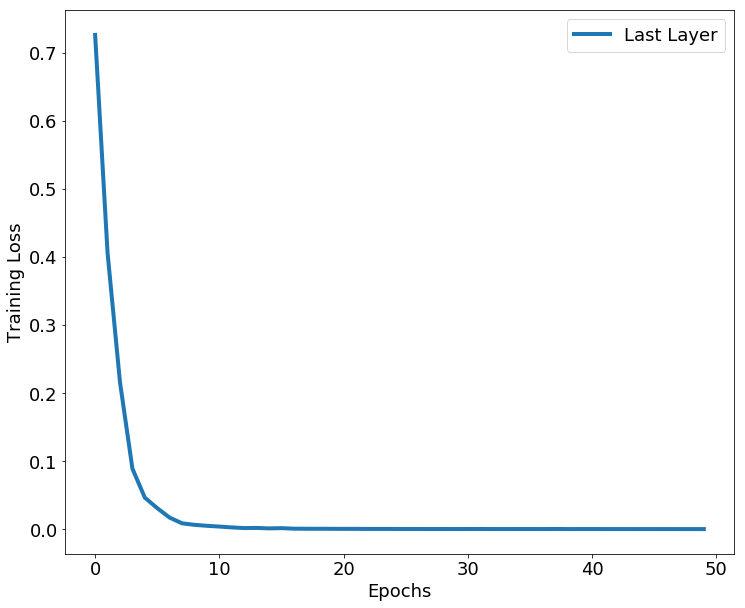

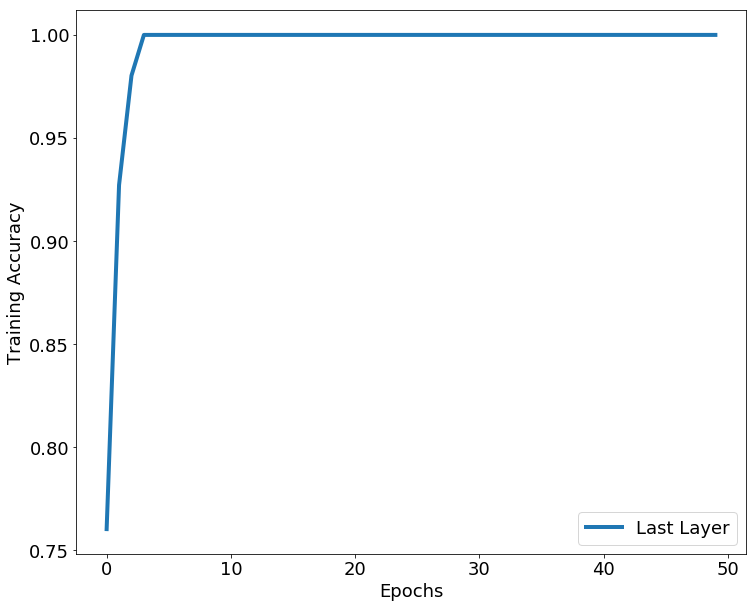

In [18]:
visualize.plot_layers(main_loss, xlabel='Epochs', ylabel='Training Loss')
visualize.plot_layers(main_acc, xlabel='Epochs', ylabel='Training Accuracy')

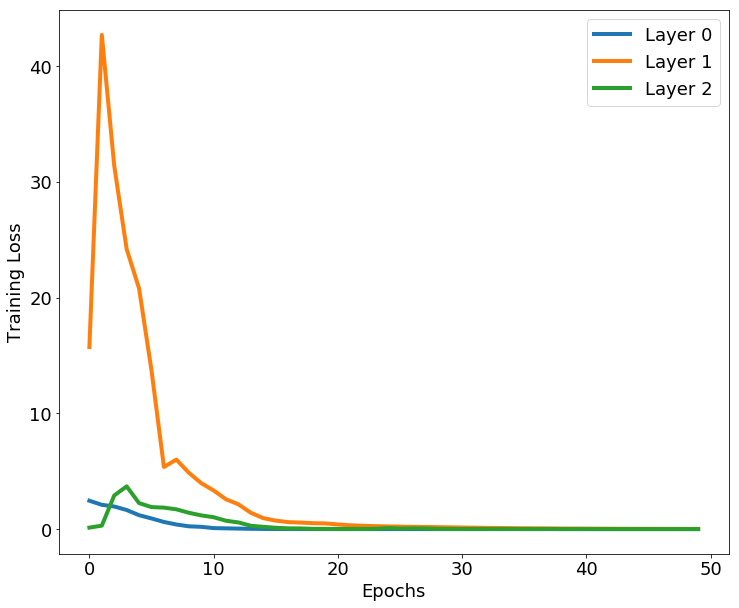

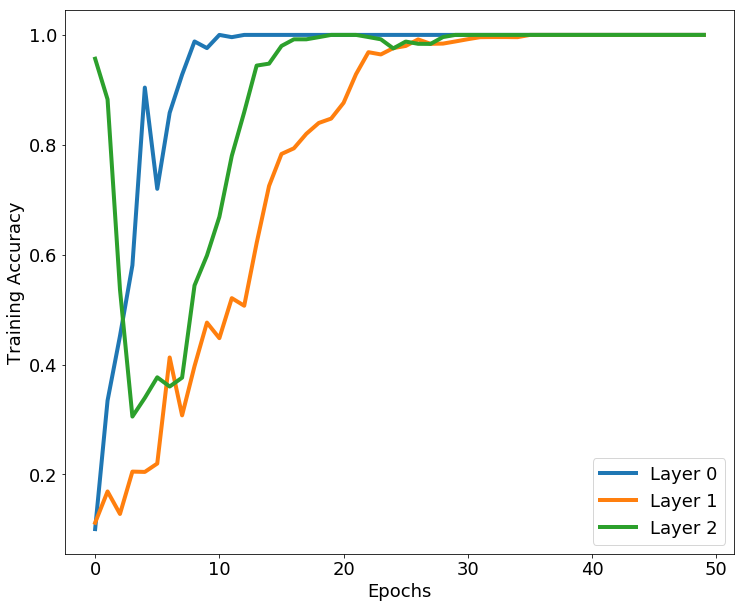

In [19]:
visualize.plot_layers(zip(*branch_loss), xlabel='Epochs', ylabel='Training Loss')
visualize.plot_layers(zip(*branch_acc), xlabel='Epochs', ylabel='Training Accuracy')

Run test suite and visualize

In [20]:
#set network to inference mode
branchyNet.testing()
branchyNet.verbose = False
if cuda.available:
    branchyNet.to_gpu()
g_baseacc, g_basediff, _, _ = utils.test(branchyNet,x_test,y_test,main=True,batchsize=TEST_BATCHSIZE)
g_basediff = (g_basediff / float(len(y_test))) * 1000.

#branchyNet.to_cpu()
c_baseacc, c_basediff, _, _ = utils.test(branchyNet,x_test,y_test,main=True,batchsize=TEST_BATCHSIZE)
c_basediff = (c_basediff / float(len(y_test))) * 1000.

In [21]:
# Specify thresholds
thresholds = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1., 2., 3., 5., 10.]

In [22]:
#GPU
if cuda.available:
    branchyNet.to_gpu()
g_ts, g_accs, g_diffs, g_exits = utils.screen_branchy(branchyNet, x_test, y_test, thresholds,
                                                    batchsize=TEST_BATCHSIZE, verbose=True)


#convert to ms
g_diffs *= 1000.

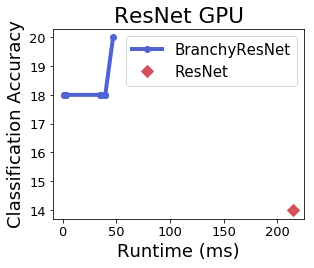

In [23]:
visualize.plot_line_tradeoff(g_accs, g_diffs, g_ts, g_exits, g_baseacc, g_basediff, all_samples=False, inc_amt=-0.0001000,
                             our_label='BranchyResNet', orig_label='ResNet', xlabel='Runtime (ms)', 
                             title='ResNet GPU', output_path='_figs/resnet_gpu.pdf')

In [24]:
#CPU
branchyNet.to_cpu()
c_ts, c_accs, c_diffs, c_exits  = utils.screen_branchy(branchyNet, x_test, y_test, thresholds,
                                                     batchsize=TEST_BATCHSIZE, verbose=True)

#convert to ms
c_diffs *= 1000.

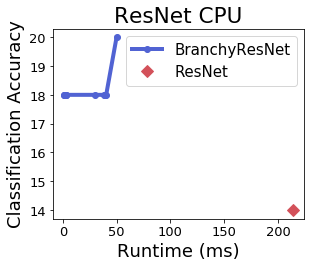

In [25]:
visualize.plot_line_tradeoff(c_accs, c_diffs, c_ts, c_exits, c_baseacc, c_basediff, all_samples=False, inc_amt=-0.0001000,
                             our_label='BranchyResNet', orig_label='ResNet', xlabel='Runtime (ms)',
                             title='ResNet CPU', output_path='_figs/resnet_cpu.pdf')

In [26]:
print 'CPU Results:'
utils.branchy_table_results('ResNet', c_baseacc, c_basediff, c_accs, c_diffs, c_exits, c_ts)

print '\n\n'

print 'GPU Results:'
utils.branchy_table_results('ResNet', g_baseacc, g_basediff, g_accs, c_diffs, g_exits, g_ts)

CPU Results:
        Network        Acc.(%)       Time(ms)           Gain      Thrshld.T        Exit(%)
         ResNet          14.00         213.71              -              -              -
       B-ResNet          12.00         206.86           1.03{0.0001, 0.0001}{0.0, 2.0, 98.0}
       B-ResNet          12.00         196.11           1.09{0.0001, 0.0005}{0.0, 2.0, 98.0}
       B-ResNet          12.00         212.85           1.00{0.0001, 0.001}{0.0, 2.0, 98.0}
       B-ResNet          10.00         214.37           1.00{0.0001, 0.005}{0.0, 4.0, 96.0}
       B-ResNet          10.00         213.88           1.00 {0.0001, 0.01}{0.0, 4.0, 96.0}
       B-ResNet           8.00         202.20           1.06{0.0001, 0.025}{0.0, 10.0, 90.0}
       B-ResNet           8.00         182.75           1.17 {0.0001, 0.05}{0.0, 10.0, 90.0}
       B-ResNet           8.00         202.36           1.06{0.0001, 0.075}{0.0, 10.0, 90.0}
       B-ResNet           8.00         201.89           1.06  {0

Save model/data

In [27]:
import dill
branchyNet.to_cpu()
with open("_models/resnet_cifar10.bn", "wb") as f:
    dill.dump(branchyNet, f)
with open("_models/resnet_cifar10_gpu_results.pkl", "wb") as f:
    dill.dump({'accs': g_accs, 'rt': g_diffs, 'exits': g_exits, 'ts': g_ts, 'baseacc': g_baseacc, 'basediff': g_basediff}, f)
with open("_models/resnet_cifar10_cpu_results.pkl", "wb") as f:
    dill.dump({'accs': c_accs, 'rt': c_diffs, 'exits': c_exits, 'ts': c_ts, 'baseacc': c_baseacc, 'basediff': c_basediff}, f)